In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
import cv2
import imghdr

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_18636\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [60]:
import tensorflow as tf

In [5]:
data_dir="dataset"

In [6]:
image_exten=["jpeg",'jpg','png']

In [11]:
os.listdir(os.path.join(data_dir,'sad'))

['0x0.jpg',
 '1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg',
 '280-2804580_sad-people-png-sad-person-png-transparent-png.png',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '504212.jpg',
 '51079685_M-1280x429.jpg',
 '51079685_M.jpg',
 '52672678._SX318_SY475_.jpg',
 '5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '766x415_Depression_vs_Sadness.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD.jpg',
 '8iAb9k4aT.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'AdobeStock_221688877-copy.jpg',
 'artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg',
 'artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg',
 'at-home-sad-sofa-300x200.jpg',
 'b11b520b0818895ae5563d1e70294052.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'boy-with-head-down.jpg',
 'crying-at-work.jpg',
 'Crying-girl.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'DD-blogpost-SAD-940x492.png',
 'de2a0

In [14]:
os.listdir(os.path.join(data_dir,"happy"))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [57]:
for c in os.listdir(data_dir):
    print(c)
    for image in os.listdir(os.path.join(data_dir,c)):
        image_path=os.path.join(data_dir,c,image)
        #print(image_path)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exten:
                print('image not in ext list',)
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path) 


happy
sad


In [44]:
img=cv2.imread(os.path.join(data_dir,'happy',"happiness.jpg"))

In [45]:
type(img)

numpy.ndarray

In [46]:
img.shape

(1667, 2420, 3)

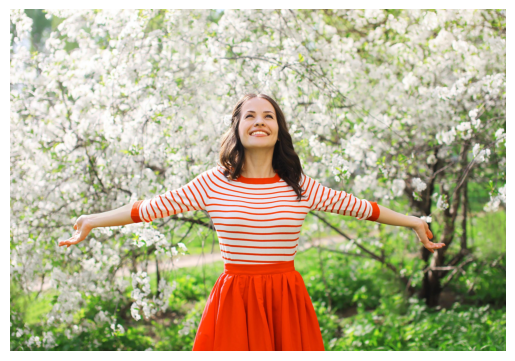

In [56]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("OFF")
plt.show()

In [61]:
tf.data.Dataset??

In [71]:
tf.keras.utils.image_dataset_from_directory??

In [64]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [70]:
class_name=data.class_names
print(class_name)

['happy', 'sad']


In [72]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
data_iterator=data.as_numpy_iterator()

In [75]:
data_iterator

In [76]:
batch=data_iterator.next()

In [84]:
batch[0].shape

(32, 256, 256, 3)

In [96]:
len(batch[0][:4])

4

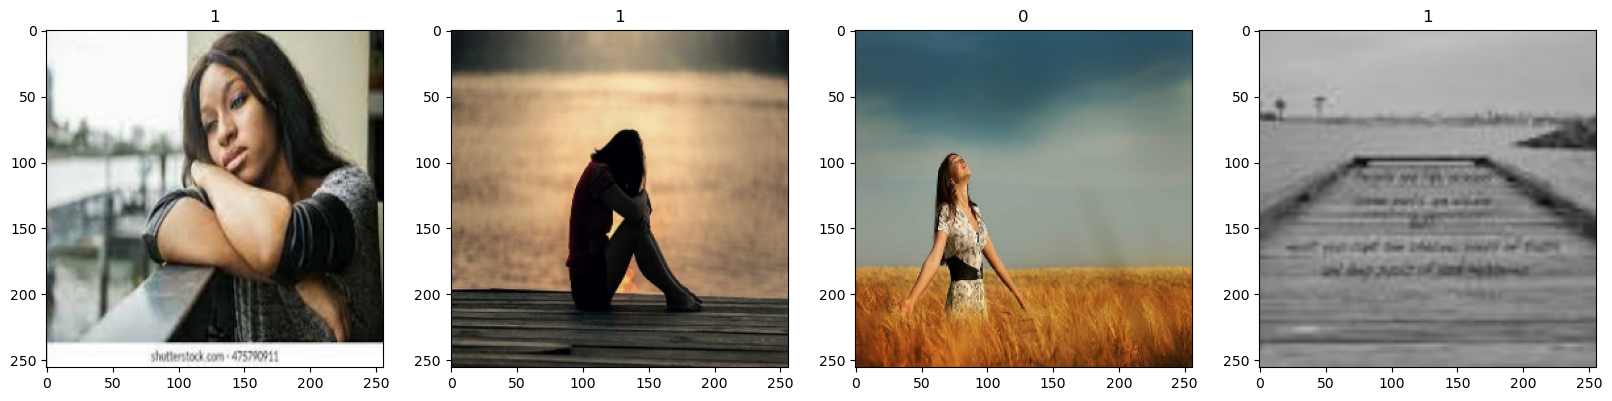

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])